In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as constant
from scipy.optimize import curve_fit
import random
import math
import scipy.stats as stats
from tqdm.notebook import tqdm, trange
import ipywidgets as widgets

# Maxwell-Boltzmann Distribution
The Maxwell-Boltzmann distribution is a distribution in velocity. Thus we aim to find that the velocities of our particles, after a sufficient number of collisions, follow this distribution. The same would be true for momentum for particles that do not change in mass. For energy, however, the probability distribution of the energies of the particles is modelled by a simpler Boltzmann distribution.
## 1 Dimension in Velocity
The Maxwell-Boltzmann Distribution in 1 Dimension has the form:
$$ f_{1D}(v)=\left(\frac{m}{2πkT}\right)^{1/2} exp\left(\frac{−mv^2}{2kT}\right),$$
where $v$ is the velocity for a particle, $m$ is the mass of the particles, $k$ is the Boltzmann constant, and $T$ is temperature in Kelvin. Where the average particle velocity is:
$$\langle |v| \rangle = \left( \frac{2kT}{\pi m} \right)^{1/2}.$$
To interpret as speed and not velocity the distribution is multiplied by 2. 

A generalised form of the formula can be seen here:
$$f(v) = 2\sqrt{\frac{\alpha}{\pi}}e^{-\alpha v^2},$$
where $\alpha$ is the parameter defining the attributes of the distribution.

## 2 Dimensions in Velocity
The Maxwell-Boltzmann Distribution in 2 Dimensiona has the form:
$$ f_{2D}(v)=\left(\frac{m}{2πkT}\right)exp\left(\frac{−mv^2}{2kT}\right),$$
where $v$ is the velocity for a particle, $m$ is the mass of the particles, $k$ is the Boltzmann constant, and $T$ is temperature in Kelvin. Where the average particle velocity is:
$$\langle |v| \rangle = \left( \frac{8kT}{\pi m} \right).$$

A generalised form of the formula can be seen here:
$$f(v) = \frac{\alpha}{\pi}e^{-\alpha v^2},$$
where $\alpha$ is the parameter defining the attributes of the distribution.

## Boltzmann Distribution in Energy
The Boltzmann distribution defines the probability that a system will be in a certain state as a function of that state's energy and temperature and is expressed in the form:
$$p(\epsilon_i) \approx e^{-\frac{\epsilon_i}{k_BT}}$$
where $\epsilon_i$ is the energy of the state, and $p$ is the probaility of the system being in state $i$

[8.14238015e-07 9.99999387e-01 2.00000490e+00]


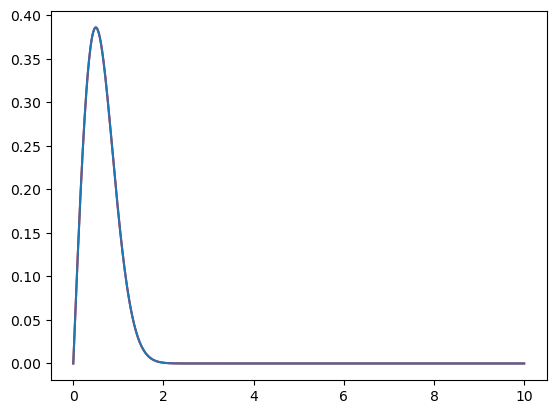

In [2]:
def Maxwell_Boltzmann_1D(v, m=1, T=10000):
    return 2*np.sqrt(m/(2*np.pi*constant.k*T)) * np.exp(-(m*(v)**2)/(2*constant.k*T))

def Maxwell_Boltzmann_1D_Simple(v, v_offset = 0, k = 1, alpha = 2):
    # return k*2*np.sqrt(alpha/np.pi) * np.exp(-alpha*(v)**2)
    # return background + 2*np.sqrt(alpha/np.pi) * np.exp(-alpha*(v-v_offset)**2)
    return k*2*np.sqrt(alpha/np.pi) * np.exp(-alpha*(v-v_offset)**2)

def Maxwell_Boltzmann_2D(v, v_offset = 0,m=1,T=10000):
    return (m*(v-v_offset))/(constant.k*T) * np.exp(-(m*(v-v_offset)**2)/(2*constant.k*T))
    # return background + (m*(v-v_offset))/(constant.k*T) * np.exp(-(m*(v-v_offset)**2)/(2*constant.k*T))


def Maxwell_Boltzmann_2D_Simple(v,v_offset = 0, k=1, alpha=2):
    return k*2*alpha/np.pi*(v-v_offset)* np.exp(-alpha*(v-v_offset)**2)
    # return k*2*alpha/np.pi*(v)* np.exp(-alpha*(v)**2)
    # return background + 2*alpha/np.pi*(v-v_offset)* np.exp(-alpha*(v-v_offset)**2)

def Maxwell_Boltzmann_2D_speed(v,v_offset = 0, alpha = 1, k = 1, l = 1):
    return k*2*alpha*(v-v_offset)*np.exp(-alpha*l*(v-v_offset)**2)
    
v = np.linspace(0,10,1000)
f = Maxwell_Boltzmann_2D_Simple(v)
plt.plot(v,f,'r')

params, pcov = curve_fit(Maxwell_Boltzmann_2D_Simple, v, f, p0=[0,1,20], bounds = (0, 100))
perr = np.sqrt(np.diag(pcov))
x_interval_for_fit = np.linspace(v[0], v[-1], 10000)
print(params)

plt.plot(v, Maxwell_Boltzmann_2D_Simple(v, *params), label='f')

plt.show()

In [3]:
class ParticleND:
    def __init__(self, velocities = [1,1], commodities = 0, commodity_value = 0.5, m = 1, dimensions = 2):
        
        self.dimensions = dimensions
        self._mass = m
        self._velocity = np.ones(self.dimensions)
        self.commodities = commodities
        
        self.pessimism_optimism = random.uniform(-commodity_value*0.5, commodity_value*0.5)
        self.commodity_value = commodity_value + self.pessimism_optimism
        self.commodity_value_intrinsic = commodity_value
        
        assert commodities >= 0 and type(commodities) == int, 'Must have positive integer commodity'
        assert len(velocities) <= dimensions, 'Too few dimensions for provided input velocity array'
        
        for i, value in enumerate(velocities):
            self._velocity[i] = float(value)
            
        self._momentum = self._mass*self._velocity
        self.energy = 0.5*self._mass*np.linalg.norm(self._velocity)**2
        
        # Error handling
        assert dimensions > 0 and type(dimensions) == int, 'Must have positive integer dimensions'
        assert type(m) == int or type(m) == float, 'Mass must be numeric'
    
    @property
    def net_assets(self):
        return self._velocity[0] + self.commodity_value_intrinsic*self.commodities
    
    @property
    def mass(self):
        return self._mass

    @mass.setter
    def mass(self, value):
        self._mass = value
        self._momentum = self._mass*self._velocity
        self.energy = 0.5*self._mass*np.linalg.norm(self._velocity)**2
    
    @property
    def velocity(self):
        return self._velocity
    
    @velocity.setter
    def velocity(self, value):
        # print("velocity setter method called")
        self._velocity = value
        self._momentum = self._mass*self._velocity
        self.energy = 0.5*self._mass*np.linalg.norm(self._velocity)**2

    @property
    def momentum(self):
        return self._momentum
    
    @momentum.setter
    def momentum(self, value):
        # print("setter method called")
        self._momentum = value
        self._velocity = self._momentum/self.mass
        self.energy = 0.5*self._mass*np.linalg.norm(self._velocity)**2
        
    @property
    def momentum_magnitude(self):
        return np.linalg.norm(self._momentum)
    
    @property
    def velocity_magnitude(self):
        return np.linalg.norm(self._velocity)

    def update(self):
        self._momentum = self._mass*self._velocity
        self.energy = 0.5*self._mass*np.linalg.norm(self._velocity)**2
        

In [1]:
class Simulation():
    
    def __init__ (self,mean_collision_probability = 1, starting_commodities = 0, commodity_value = 0.5, starting_velocity = 1,particle_mass = 2, no_particles = 100, sim_length=100, Dimensions = 2):
        self.no_particles = int(no_particles)
        self.simulation_length = int(sim_length)+1
        self.v0 = starting_velocity
        self.starting_commodities = starting_commodities
        self.commodity_value = 0.5
        self.m = particle_mass
        self.dimensions = Dimensions
        self.mean_probability_of_collision = mean_collision_probability


        
        self.init_particles()
        
    def init_particles(self):
        
        # Creating storage array for 4 constant variables: mass, energy, and magnitude of velocity and momentum
        # then 2*dimensions for vector velocity and momentum
        self.particle_history = np.full([7+2*self.dimensions,self.no_particles,self.simulation_length], 0.69,dtype=float)
        # array of particle objects
        self.particles = []
        
        self.particle_history_dict = {
            'Mass'       : 0,
            'Energy'     : 1,
            'Velocity'   : 2,
            'Momentum'   : 3,
            'Commodities': 4,
            'Commodity_Value': 5,
            'Net_Assets' : 6
        }
        
        for i in range(self.dimensions):
            # Creating string for dimension specific labels

            self.particle_history_dict['Velocity' + f'_{i+1}'] = 7 + i
            self.particle_history_dict['Momentum' + f'_{i+1}'] = 7 + i + self.dimensions

        # Creating particle object for each particle in simulation
        for i in range(self.no_particles):
            
            
            # Creating particles & may want to unify particle objects if their methods become extensive
            particle = ParticleND(velocities = np.full(self.dimensions,self.v0,dtype=float),commodities = self.starting_commodities, commodity_value = self.commodity_value, m = 1, dimensions = self.dimensions)

            self.particles.append(particle)
            
            # Adding particle properties to history array
            self.particle_history[0,i,0] = particle.mass
            self.particle_history[1,i,0] = particle.energy
            self.particle_history[2,i,0] = particle.velocity_magnitude
            self.particle_history[3,i,0] = particle.momentum_magnitude
            self.particle_history[4,i,0] = particle.commodities
            self.particle_history[5,i,0] = particle.commodity_value
            self.particle_history[6,i,0] = particle.net_assets

            # For greater than 1 dimension simulations
            for j in range(self.dimensions):
                self.particle_history[j+7,i,0] = particle.velocity[j]
                self.particle_history[j+7+self.dimensions,i,0] = particle._momentum[j]
    
    def begin_simulation(self, collision_probability = 'all', collision_partner = 'random',collision_type = 'kinetic', collision_test = False, particle_history_test = False):
        self.type = collision_type
        self.collision_probability = collision_probability
        self.collision_partner = collision_partner
        self.collision_test = collision_test
        self.particle_history_test = particle_history_test
        
        for self.time in tqdm(range(1,self.simulation_length),desc='Colliding... '): 
            
            self.create_list_of_collisions()
            np.random.shuffle(self.list_of_collisions)
            
            self.determine_collision_partners()
            print(self.collision_partners)
            
            self.simulate_list_of_collisions()
        
        print('Simulation Complete!')
    
    def create_list_of_collisions(self):
        self.list_of_collisions = []
        
        if self.collision_probability == 'proportional':
            # loop through all particles
            for particle_index, particle in enumerate(self.particles):

                # Repeat collision check for velocities greater than 1
                number_of_checks = math.ceil(particle.velocity[0]) # Should I use magnitude velocity/net_assets
                check = 0
                collided = False
                while collided == False and check < number_of_checks:
                    collided = self.collision_check(particle)
                    check += 1

                if collided == True:
                    self.list_of_collisions.append(particle_index)
                    
                    
        elif self.collision_probability == 'all':
            # Maintain 50% chance of causing a collision
            particle_index_list = list(range(0,self.no_particles))
            np.random.shuffle(particle_index_list)
            self.list_of_collisions= particle_index_list[:int(len(particle_index_list)/2)]
            
    def collision_check(self, particle):
        
        # Chooses whether a particle will cause a collision
        # 50% chance to collide for 0.5
        # 25% chance to collide for 0.25
        
        if np.random.random() < self.mean_probability_of_collision:
            return True

    def determine_collision_partners(self):
        
        self.collision_partners = []

        # Creating list of collision partners
        if self.collision_partner == 'proportional':
            # Note that this does not prevent particles from colliding with themselves 
            # Equivalent to collision partner lottery with number of tickets bought being defined by wealth

            for i in range(self.no_particles):
                no_tickets = math.ceil(self.particles[i].net_assets)

                for j in range(no_tickets):
                    self.collision_partners.append(i)
                    
        elif self.collision_partner == 'random':
            
            self.collision_partners = list(range(self.no_particles))    
    
    
    def simulate_list_of_collisions(self):
        
        for collision_index, index1 in enumerate(self.list_of_collisions):
            
            index2 = random.choice(self.collision_partners)
            
            # Prevents particles from colliding with themselves
            if index1 == index2:
                self.update_parameters(index1,index2)
                continue
            
            if self.collision_test == True:
                v1before = self.particles[index1].velocity_magnitude
                v2before = self.particles[index2].velocity_magnitude

            self.collision(self.particles[index1],self.particles[index2])
            
            if self.collision_test == True:
                print(f'Particle {index1} velocity before {v1before}, after: {self.particles[index1].velocity_magnitude}, difference = {self.particles[index1].velocity_magnitude-v1before}')
                print(f'Particle {index2} velocity before {v2before}, after: {self.particles[index2].velocity_magnitude}, difference = {self.particles[index2].velocity_magnitude-v2before}')
            
            self.update_parameters(index1,index2)    
        
        # Updating parameters for those not involved in a collision
        for index in range(self.no_particles):
            self.update_parameters(index)

            
            
    def collision(self,particle1,particle2):

        # Select for type of collision
        if self.type == 'kinetic':
            self.kinetic_collision(particle1,particle2)
        elif self.type == 'exchange':
            self.exchange(particle1,particle2)
        elif self.type == 'transaction':
            self.transaction(particle1,particle2)
            
    def transaction(self,particle1,particle2):
        # Velocity is the equivalent to cash in this simulation
        # Here we will exchange velocity for commodities        
        if particle1.commodity_value > particle2.commodity_value and particle2.commodities > 0 and particle1.velocity[0] > particle1.commodity_value:
            particle1.commodities += 1
            particle1.velocity[0] -= particle1.commodity_value
            
            particle2.commodities -= 1
            particle2.velocity[0] += particle1.commodity_value
        elif particle2.commodity_value > particle1.commodity_value and particle1.commodities > 0 and particle2.velocity[0] > particle2.commodity_value:
            particle2.commodities += 1
            particle2.velocity[0] -= particle2.commodity_value
            
            particle1.commodities -= 1
            particle1.velocity[0] += particle2.commodity_value
        
        particle1.update()
        particle2.update()
        
    
    def exchange(self,particle1,particle2):
        
        self.kinetic_collision(particle1,particle2)
        
        total_commodities = particle1.commodities + particle2.commodities
        fractional_commodity_transfer = np.random.random()
        
        particle1.commodities = round(total_commodities*fractional_commodity_transfer)
        particle2.commodities = round(total_commodities*(1-fractional_commodity_transfer))
            
    def kinetic_collision(self,particle1,particle2):
        
        # Momentum is conserved
        # mv + m'v' (before) = mv + m'v' (after)

        p_before = np.ones(self.dimensions)
        p_after = np.ones((self.dimensions,2))
        v_after = np.ones((self.dimensions,2))
        fractional_momentum_transfer = np.ones(self.dimensions)

        for i in range(self.dimensions):
            p_before[i] = particle1.mass*particle1.velocity[i] + particle2.mass*particle2.velocity[i]
            
            # randomise transfer of energy
            fractional_momentum_transfer[i] = np.random.random()
        
            p_after[i,0] = fractional_momentum_transfer[i]*p_before[i]
            p_after[i,1] = (1-fractional_momentum_transfer[i])*p_before[i]  
            
            v_after[i,0] = p_after[i,0]/particle1.mass
            v_after[i,1] = p_after[i,1]/particle1.mass
                     
            particle1.velocity[i] = v_after[i,0]
            particle2.velocity[i] = v_after[i,1]
            
            particle1.update()
            particle2.update()

    def update_parameters(self,*indices):
        
        for index in indices:
                    
            self.particle_history[0,index,self.time] = self.particles[index].mass
        
            self.particle_history[1,index,self.time] = self.particles[index].energy

            self.particle_history[2,index,self.time] = self.particles[index].velocity_magnitude

            self.particle_history[3,index,self.time] = self.particles[index].momentum_magnitude
        
            self.particle_history[4,index,self.time] = self.particles[index].commodities
        
            self.particle_history[5,index,self.time] = self.particles[index].commodity_value
        
            self.particle_history[6,index,self.time] = self.particles[index].net_assets
            
            for j in range(self.dimensions):
            
                if self.particle_history_test == True:
                    if self.particle_history[j+7,index,self.time] == 0.69:
                        vbefore = self.particle_history[j+7,index,self.time-1]
                    else:
                        vbefore = self.particle_history[j+7,index,self.time]

                self.particle_history[j+7,index,self.time] = self.particles[index].velocity[j]

                if self.particle_history_test == True:
                    diff = abs(self.particle_history[j+7,index,self.time] - vbefore)
                    print(f'Particle History @ Time {self.time}: particle {index} v Before = {vbefore}, After = {self.particle_history[j+7,index,self.time]}, Difference = {diff}')
                    if diff > 1:
                        print(f'Error: for particle {index} between velocity and previous velocity is greater than 1 @ time: {self.time}')

                self.particle_history[j+7+self.dimensions,index,self.time] = self.particles[index]._momentum[j]
            
    def fit_Maxwell_Boltzmann(self, bin_heights, bin_edges, ax, variable_being_fitted):
        bin_centres = bin_edges[:-1] + np.diff(bin_edges)/2
        ax.plot(bin_centres,bin_heights)

        opt_params, pcov = curve_fit(Maxwell_Boltzmann_2D_speed, bin_centres, bin_heights, p0=[1, 1, 1], bounds = (0,50))
        perr = perr = np.sqrt(np.diag(pcov))
        x_interval_for_fit = np.linspace(bin_edges[0], bin_edges[-1], 10000)
        fit_y = Maxwell_Boltzmann_2D_Simple(x_interval_for_fit, *opt_params)
        ax.plot(x_interval_for_fit, fit_y, label = 'f')

    def plot_data(self,time_steps_to_plot = [], MB_fit = False ,Mass = False, Energy = False, Velocity = True, Momentum = False, **other_variables):
        plot_data_arguments = {}
        self.time_steps_to_plot = time_steps_to_plot
        
        for key, value in locals().items():
            if type(value) == bool:
                plot_data_arguments[key] = value
        
        for key, value in other_variables.items():
            plot_data_arguments[key] = value
        
        size_of_plot = 0
        for key, value in plot_data_arguments.items():
            if value == True:size_of_plot += 1
        
        self.distributions = []
        
        plt.rcParams["figure.figsize"] = (20,size_of_plot*5)
        plt.rcParams["figure.dpi"] = 50
        plt.rcParams['font.size'] = 22
        
        fig = plt.figure(constrained_layout=True)        

        plot_index = 0

        variables_to_plot = []
        
        for i, (key,value) in enumerate(plot_data_arguments.items()):
            if value == True:
                variables_to_plot.append(key)

        plt.suptitle(f'Parameter Distributions at Different time step in {self.dimensions}-Dimension Collision Simulation',fontsize='xx-large')
        subfigs = fig.subfigures(nrows=size_of_plot, ncols=1)

        for row, subfig in enumerate(np.array(subfigs,ndmin=1)):
            subfig.suptitle(f'{variables_to_plot[row]} Distribution',fontsize='large')
            axs = subfig.subplots(nrows=1, ncols=len(time_steps_to_plot))
            for col, ax in enumerate(np.array(axs,ndmin=1)):
                bin_heights , bin_edges, _ = ax.hist(self.particle_history[self.particle_history_dict[variables_to_plot[row]],:,time_steps_to_plot[col]],bins=40,density = True,stacked = True)
                ax.set_title(f'Time = {time_steps_to_plot[col]}', fontsize = 'large')
                # ax.set_xlim(0,0.6*np.max(self.particle_history[self.particle_history_dict[variables_to_plot[row]],:,:]))
                if MB_fit == True:
                    self.fit_Maxwell_Boltzmann(bin_heights, bin_edges, ax, variables_to_plot[row])
                self.distributions.append(bin_heights)        
        

        plt.show()
        return self.distributions
    
# Manual simulation run if desired
sim = Simulation(no_particles=10,sim_length=10, Dimensions = 1)
sim.begin_simulation(collision_probability = 'proportional', collision_partner = 'random',collision_type = 'kinetic',collision_test= False, particle_history_test = False)

NameError: name 'np' is not defined

# Running Simulation
Enter the desired parameters of simulation then press "Run Simulation"

In [15]:
number_of_particles_widget = widgets.IntText(
    value=100,
    description='Particles',
    disabled=False
)

number_of_collisions_widget = widgets.IntText(
    value=100,
    description='Collisions',
    disabled=False
)

Dimensions_widget = widgets.IntText(
    value=1,
    description='Dimensions',
    disabled=False
)

collision_probability_widget = widgets.ToggleButtons(
    options=['All', 'Proportional'],
    description='Choosing probability for list of collision creator',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltips=['Description of slow', 'Description of regular'],
#     icons=['check'] * 3
)

collision_partner_widget = widgets.ToggleButtons(
    options=['All', 'Proportional'],
    description='Choosing method of collision partner selection',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltips=['Equal probability of all particles', 'Probabilty proportional to net assets'],
#     icons=['check'] * 3
)

collision_type_widget = widgets.ToggleButtons(
    options=['kinetic', 'exchange','transaction'],
    description='Choosing mechanism of collision',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltips=['Kinetic, momentum-conserved collision at random geometry', 'Random exchange of commodities and momentum','Transaction involving trade of commodities for velocity/money based upon commodity valuation'],
#     icons=['check'] * 3
)

collision_test_widget = widgets.Checkbox(
    value=False,
    description='Collision testing',
    disabled=False,
    indent=False
)

particle_history_test_widget = widgets.Checkbox(
    value=False,
    description='Particle History Array testing',
    disabled=False,
    indent=False
)

def Define_Simulation_Parameters(number_of_particles = 100, number_of_collisions = 100, Dimensions = 1,
                                 collision_probability ='all', collision_partner = 'random',collision_type = 'kinetic',
                                 collision_test= False, particle_history_test = False):
    number_of_particles_widget.value = number_of_particles
    number_of_collisions_widget.value = number_of_collisions
    Dimensions_widget.value = Dimensions
    
    collision_probability_widget.value = collision_probability
    collision_partner_widget.value = collision_partner
    collision_type_widget.value = collision_type
    collision_test_widget.value = collision_test
    particle_history_test_widget.value = particle_history_test

widgets.interact(Define_Simulation_Parameters, number_of_particles=number_of_particles_widget, number_of_collisions = number_of_collisions_widget,
                Dimensions = Dimensions_widget, collision_probability = collision_probability_widget, collision_partner = collision_partner_widget,
                 collision_type = collision_type_widget, collision_test = collision_test_widget, particle_history_test = particle_history_test_widget)
    
button = widgets.Button(description="Run Simulation")
output = widgets.Output()

display(button, output)

sim = Simulation(no_particles=100,sim_length=100, Dimensions = 1)
def on_button_clicked(b):
    with output:
        sim = Simulation(no_particles = number_of_particles_widget.value, sim_length = number_of_collisions_widget.value, Dimensions = Dimensions_widget.value)
        sim.begin_simulation(collision_probability_widget.value,collision_partner_widget.value,collision_type_widget.value,collision_test_widget.value, particle_history_test_widget.value)
        print(f'Number of Particles: {number_of_particles_widget.value}, Length of Simulation: {number_of_collisions_widget.value}, Dimensions: {Dimensions_widget.value}')
        print(f'Collision probability: {collision_probability_widget.value}, Collision Partner: {collision_partner_widget.value}, Collision Type: {collision_type_widget.value}')
        print(f'Collision Test: {collision_test_widget.value}, Particle history array test: {particle_history_test_widget.value}')


button.on_click(on_button_clicked)

interactive(children=(IntText(value=100, description='Particles'), IntText(value=100, description='Collisions'…

Button(description='Run Simulation', style=ButtonStyle())

Output()

# Animating Simulation Data
Select the variables you would like to plot and it will be animated over time

In [14]:
def animate_plot(Time=0):
    sim.plot_data(time_steps_to_plot = [Time]);


slider = widgets.IntSlider(min= 0, max=sim.simulation_length-1)
play = widgets.Play(min= 0, max=sim.simulation_length-1)

widgets.jslink((play, 'value'), (slider, 'value'))
widgets.interact(animate_plot, Time = slider)
widgets.HBox([play, slider])

interactive(children=(IntSlider(value=0, description='Time', max=10), Output()), _dom_classes=('widget-interac…

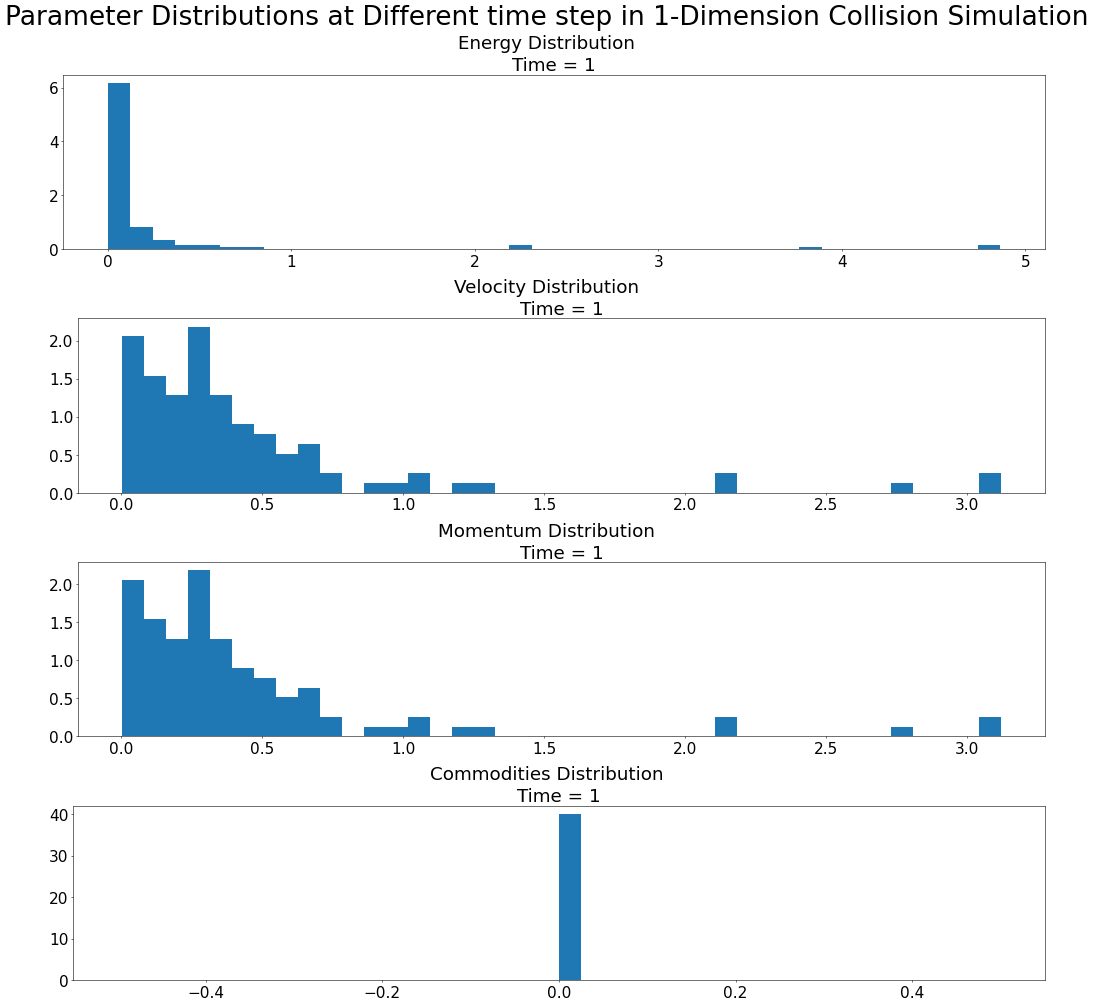

In [13]:
distributions = sim.plot_data(time_steps_to_plot = [1],Energy = True, Momentum = True,Commodities=True)

col: 0, ax: AxesSubplot(0.125,0.125;0.168478x0.755)
col: 1, ax: AxesSubplot(0.327174,0.125;0.168478x0.755)
col: 2, ax: AxesSubplot(0.529348,0.125;0.168478x0.755)
col: 3, ax: AxesSubplot(0.731522,0.125;0.168478x0.755)


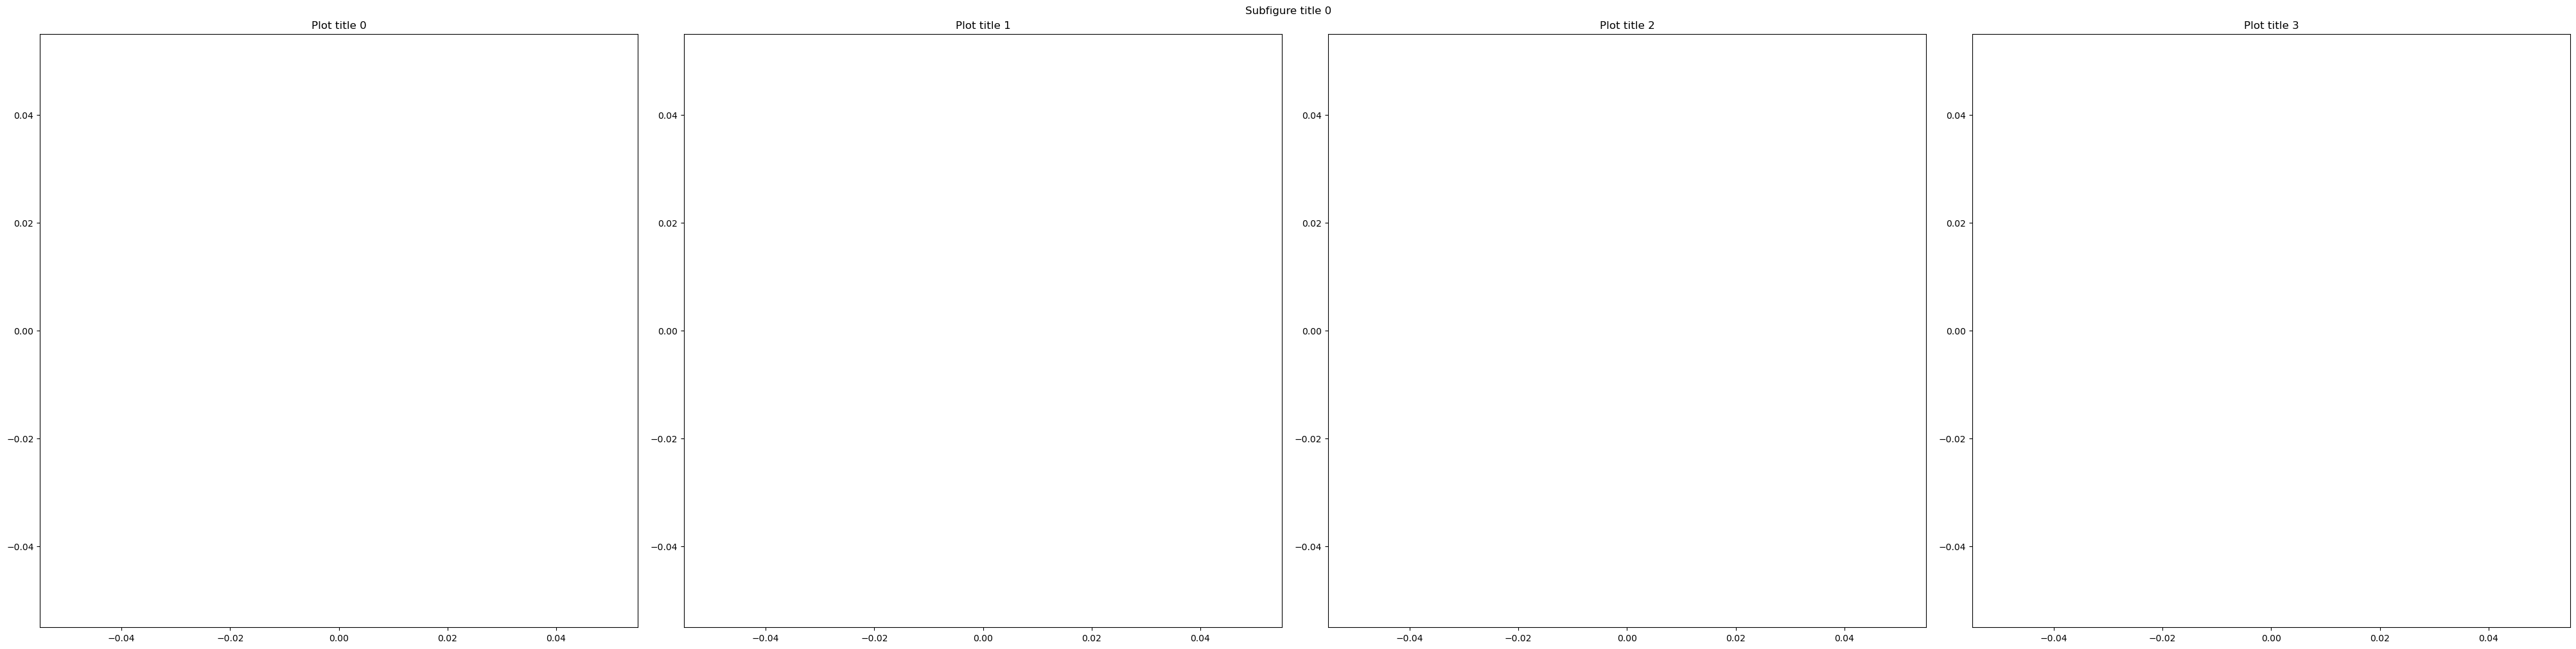

In [72]:
fig = plt.figure(constrained_layout=True)
time_steps = [0, 1, 2, 3]
dictionary = {
    'mass' : True
}



# for key, value in dictionary:
#     if value == True:
        
# create 3x1 subfigs
subfigs = fig.subfigures(nrows=len(dictionary), ncols=1)
for row, subfig in enumerate(np.array(subfigs, ndmin=1)):
    subfig.suptitle(f'Subfigure title {row}')

    # create 1x3 subplots per subfig
    axs = subfig.subplots(nrows=1, ncols=len(time_steps))
    for col, ax in enumerate(axs):
        print(f'col: {col}, ax: {ax}')
        ax.plot()
        ax.set_title(f'Plot title {col}')
        

In [37]:
 def plot_data(Velocity = True, Momentum = False, **other_variables):
        plot_data_arguments = {}
        for key, value in locals().items():
            if type(value) == bool:
                plot_data_arguments[key] = value
        print(locals())
        print(plot_data_arguments)
        for key, value in other_variables.items():
            plot_data_arguments[key] = value
        print(plot_data_arguments)
plot_data(Velocity = True, Momentum = False, Velocity_1=True)
# print(locals())
# print(plot_data_arguments)

{'Velocity': True, 'Momentum': False, 'other_variables': {'Velocity_1': True}, 'plot_data_arguments': {'Velocity': True, 'Momentum': False}, 'key': 'plot_data_arguments', 'value': {'Velocity': True, 'Momentum': False}}
{'Velocity': True, 'Momentum': False}
{'Velocity': True, 'Momentum': False, 'Velocity_1': True}


In [ ]:
 
    def fit_Maxwell_Boltzmann_2D(self,bin_heights, bin_edges):
        
        bin_centres = bin_edges[:-1] + np.diff(bin_edges)/2
        plt.plot(bin_centres,bin_heights)
        
        opt_params, pcov = curve_fit(Maxwell_Boltzmann_2D_Simple, bin_centres, bin_heights, p0=[1, 6])
        perr = perr = np.sqrt(np.diag(pcov))
        x_interval_for_fit = np.linspace(bin_edges[0], bin_edges[-1], 10000)
        fit_y = Maxwell_Boltzmann_2D_Simple(x_interval_for_fit, *opt_params)
        plt.plot(x_interval_for_fit, fit_y, label = 'f')
        
    def plot_energy_histogram(self):
        
        # Plotting histogram and extracting parameters for fitting with distribution
        bin_heights , bin_edges, _ = plt.hist(self.particle_history[3,-1,:],bins=40)
        
        # self.fit_Maxwell_Boltzmann_2D(bin_heights, bin_edges)

        
        
        plt.rcParams["figure.figsize"] = (20,10)
        plt.xlabel('Kinetic Energy (J)')
        plt.ylabel('Number of particles')
        plt.title('Energy distribution of equivalent colliding particles in 2D')
        plt.show()
        
    def plot_momentum_histogram(self):
            
        magnitude_momentum = np.sqrt(np.square(self.particle_history[4,-1,:])+np.square(self.particle_history[5,-1,:]))        
        bin_heights , bin_edges, _ = plt.hist(magnitude_momentum,bins=40)
        self.fit_Maxwell_Boltzmann_2D(bin_heights, bin_edges)

        plt.rcParams["figure.figsize"] = (20,10)
        plt.xlabel('Momentum (kgm/s')
        plt.ylabel('Number of particles')
        plt.title('Momentum distribution of colliding particles in 2D')
        plt.show()
        
    
    def plot_velocity_histogram(self):
        
        magnitude_velocity = np.sqrt(np.square(self.particle_history[0,-1,:])+np.square(self.particle_history[1,-1,:]))
        bin_heights, bin_edges, _ = plt.hist(magnitude_velocity,bins=40)
        self.fit_Maxwell_Boltzmann_2D(bin_heights, bin_edges)
        plt.rcParams["figure.figsize"] = (20,10)
        plt.xlabel('velocity (m/s)')
        plt.ylabel('Number of particles')
        plt.title('Velocity distribution of equivalent colliding particles in 2D')
        plt.show()
        
    def fit_Maxwell_Boltzmann(self,bin_heights, bin_edges):

        bin_centres = bin_edges[:-1] + np.diff(bin_edges)/2
        plt.plot(bin_centres,bin_heights)

        opt_params, pcov = curve_fit(Maxwell_Boltzmann_1D_Simple, bin_centres, bin_heights, p0=[1, 6])
        perr = perr = np.sqrt(np.diag(pcov))
        x_interval_for_fit = np.linspace(bin_edges[0], bin_edges[-1], 10000)
        fit_y = Maxwell_Boltzmann_1D_Simple(x_interval_for_fit, *opt_params)
        plt.plot(x_interval_for_fit, fit_y, label = 'f')


    def plot_histogram(self, particle_variable, variable_name, dimensions = 1,fit_boolean = True):
        bin_heights, bin_edges, _ = plt.hist(parameter, bins = 40, alpha = 0.5)

        if fit_boolean == True:
            fit_Maxwell_Boltzmann(bin_heights, bin_edges, variable_name)
        # !!! Define variable_name as the literal name of the particle attribute !!!

        plt.rcParams["figure.figsize"] = (20,10)
        plt.xlabel(variable_name)
        plt.ylabel('Normalised population')
        plt.title(f'{variable_name} distribution of colliding particles in {dimensions}D')
        plt.show()        
        

In [ ]:
# numpy array setter function
class ArrayAccesser:
    
    def __init__(self,dimensions = 3):
        self._matrix = np.ones(dimensions)
        
    @property
    def matrix(self):
        return self._matrix
    
    @matrix.setter
    def matrix(self,value):
        self._matrix = value
    
Object1 = ArrayAccesser(dimensions = 3)

print(Object1.matrix[0])
Object1.matrix[0] = 5
print(Object1.matrix[2])

In [24]:

class Particle:
    def __init__(self,v = 20, m = 50):
        self._velocity = v
        self._mass = m
        self._momentum = self._mass*self._velocity
        self.energy = 0.5*self._mass*self._velocity**2

    @property
    def velocity(self):
        # print("getter method called")
        
        return self._velocity

    @velocity.setter
    def velocity(self, value):
        # print("setter method called")
        self._velocity = value
        self._momentum = self._velocity*self._mass
        self.energy = 0.5*self._mass*self._velocity**2
        # print(self.energy)
    
    @property
    def momentum_magnitude(self):
        return np.linalg.norm(self._momentum)
    
    @property
    def velocity_magnitude(self):
        return np.linalg.norm(self._momentum)
        
    @property
    def mass(self):
        return self._mass

    @mass.setter
    def mass(self, value):
        self._mass = value
        self._momentum = self._velocity*self._mass
        self.energy = 0.5*self._mass*self._velocity**2
            
class Particle2D:
    def __init__(self,velocity_x = 1, velocity_y = 2, m = 3):
        self._velocity = np.array((float(velocity_x),float(velocity_y)))
        self._mass = m
        self._momentum = self._mass*self._velocity
        self.energy = 0.5*self._mass*np.linalg.norm(self._velocity)**2

    @property
    def velocity(self):
        return self._velocity
    
    @velocity.setter
    def velocity(self, value):
        # print("velocity setter method called")
        self._velocity = value
        self._momentum = self._mass*self._velocity
        self.energy = 0.5*self._mass*np.linalg.norm(self._velocity)**2
    
    @property
    def momentum_magnitude(self):
        return np.linalg.norm(self._momentum)
    
    @property
    def velocity_magnitude(self):
        return np.linalg.norm(self._velocity)

    @property
    def momentum(self):
        return self._momentum

    @momentum.setter
    def momentum(self, value):
        # print("setter method called")
        self._momentum = value
        self._velocity = self._momentum/self.mass
        self.energy = 0.5*self._mass*np.linalg.norm(self._velocity)**2
        
    @property
    def velocity_x(self):
        # print("getter method called")
        return self._velocity[0]

    @velocity_x.setter
    def velocity_x(self, value):
        # print("setter method called")
        self._velocity[0] = value
        self._momentum = self._mass*self._velocity
        self.energy = 0.5*self._mass*np.linalg.norm(self._velocity)**2
    
    @property
    def velocity_y(self):
        # print("getter method called")
        return self._velocity[1]

    @velocity_y.setter
    def velocity_y(self, value):
        # print("setter method called")
        self._velocity[1] = value
        self._momentum = self._mass*self._velocity
        self.energy = 0.5*self._mass*np.linalg.norm(self._velocity)**2
        
    @property
    def mass(self):
        return self._mass

    @mass.setter
    def mass(self, value):
        self._mass = value
        self._momentum = self._mass*self._velocity
        self.energy = 0.5*self._mass*np.linalg.norm(self._velocity)**2
    
    def update(self):
        self._momentum = self._mass*self._velocity
        self.magnitude_velocity = np.linalg.norm(self._velocity)
        self.energy = 0.5*self._mass*np.linalg.norm(self._velocity)**2
    
class Particle3D:
    def __init__(self, m = 1, v_x = 1, v_y = 1, v_z = 1):
        self._mass = m
        self._velocity = np.array((float(v_x),float(v_y),float(v_z)))
        self._momentum = self._mass*self._velocity
        self.energy = 0.5*self._mass*np.linalg.norm(self._velocity)**2

    @property
    def velocity(self):
        return self._velocity
    
    @velocity.setter
    def velocity(self, value):
        # print("velocity setter method called")
        self._velocity = value
        self._momentum = self._mass*self._velocity
        self.magnitude_velocity = np.linalg.norm(self._velocity)
        self.energy = 0.5*self._mass*np.linalg.norm(self._velocity)**2
    
    @property
    def momentum_magnitude(self):
        return np.linalg.norm(self._momentum)
    
    @property
    def velocity_magnitude(self):
        return np.linalg.norm(self._velocity)

    @property
    def momentum(self):
        return self._momentum

    @momentum.setter
    def momentum(self, value):
        # print("setter method called")
        self._momentum = value
        self._velocity = self._momentum/self.mass
        self.magnitude_velocity = np.linalg.norm(self._velocity)
        self.energy = 0.5*self._mass*np.linalg.norm(self._velocity)**2
        
    @property
    def velocity_x(self):
        # print("getter method called")
        return self._velocity[0]

    @velocity_x.setter
    def velocity_x(self, value):
        # print("setter method called")
        self._velocity[0] = value
        self._momentum = self._mass*self._velocity
        self.magnitude_velocity = np.linalg.norm(self._velocity)
        self.energy = 0.5*self._mass*np.linalg.norm(self._velocity)**2
    
    @property
    def velocity_y(self):
        # print("getter method called")
        return self._velocity[1]

    @velocity_y.setter
    def velocity_y(self, value):
        # print("setter method called")
        self._velocity[1] = value
        self._momentum = self._mass*self._velocity
        self.energy = 0.5*self._mass*np.linalg.norm(self._velocity)**2
        
    @property
    def velocity_z(self):
        # print("getter method called")
        return self._velocity[1]

    @velocity_z.setter
    def velocity_z(self, value):
        # print("setter method called")
        self._velocity[2] = value
        self._momentum = self._mass*self._velocity
        self.energy = 0.5*self._mass*np.linalg.norm(self._velocity)**2
        
    @property
    def mass(self):
        return self._mass

    @mass.setter
    def mass(self, value):
        self._mass = value
        self._momentum = self._mass*self._velocity
        self.energy = 0.5*self._mass*np.linalg.norm(self._velocity)**2
    
    def update(self):
        self._momentum = self._mass*self._velocity
        self.magnitude_velocity = np.linalg.norm(self._velocity)
        self.energy = 0.5*self._mass*np.linalg.norm(self._velocity)**2